# naive bayes using mnist

In [34]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [35]:
digits=load_digits()
X=digits.data
Y=digits.target

In [36]:
print(X.shape)

(1797, 64)


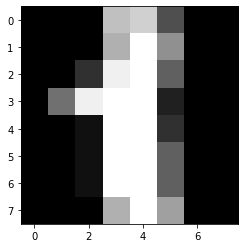

In [37]:
plt.imshow(X[1].reshape(8,8),cmap='gray')
plt.show()

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
mnb=MultinomialNB()

In [40]:
mnb.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
mnb.predict(X)

array([0, 1, 1, ..., 8, 9, 8])

In [42]:
mnb.score(X,Y)

0.9053978853644964

In [43]:
cross_val_score(mnb,X,Y,cv=5,scoring='accuracy').mean()

0.8714703025475334

In [44]:
from sklearn.metrics  import confusion_matrix

In [45]:
ypred = mnb.predict(X)
cnf_matrics = confusion_matrix(ypred,Y)

In [46]:
cnf_matrics

array([[175,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 137,   7,   0,   0,   0,   2,   0,  11,   1],
       [  0,  14, 160,   2,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 159,   0,   0,   0,   0,   0,   1],
       [  3,   0,   0,   0, 173,   1,   1,   0,   1,   1],
       [  0,   1,   0,   2,   0, 157,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 176,   0,   1,   0],
       [  0,   0,   0,   5,   4,   1,   0, 178,   1,  11],
       [  0,  13,   8,   8,   3,   2,   1,   1, 154,   7],
       [  0,  15,   2,   7,   0,  20,   0,   0,   5, 158]], dtype=int64)

In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(Y,ypred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



Confusion matrix, without normalization
[[175   0   0   0   1   0   0   0   0   0]
 [  0 137   7   0   0   0   2   0  11   1]
 [  0  14 160   2   0   0   0   0   1   0]
 [  0   0   0 159   0   0   0   0   0   1]
 [  3   0   0   0 173   1   1   0   1   1]
 [  0   1   0   2   0 157   1   0   0   1]
 [  0   2   0   0   0   1 176   0   1   0]
 [  0   0   0   5   4   1   0 178   1  11]
 [  0  13   8   8   3   2   1   1 154   7]
 [  0  15   2   7   0  20   0   0   5 158]]


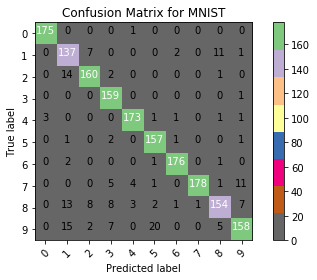

In [54]:
plot_confusion_matrix(cnf_matrics,classes=np.arange(10),normalize=False,title="Confusion Matrix for MNIST",cmap=plt.cm.Accent_r)